In [92]:
import sympy as sym
from sympy import pprint, latex, root
from IPython.display import display, Latex
import matplotlib.pyplot as plt
from matplotlib import patches, patheffects
import matplotlib.lines as mlines
import numpy as np

# parameters
m = sym.Symbol("m")
delta = sym.Symbol("\delta")
F_0 = sym.Symbol("F_0")
x_max = sym.Symbol("x_max")
max_power = sym.Symbol("P_max")

# free vibration vars
c = sym.Symbol("c")
k = sym.Symbol("k")

# optimization problem
f = -sym.ln(delta*sym.sqrt(1-c**2/(4*m*k)))*2*m/c
g1 = F_0*sym.sqrt(m)/(c*sym.sqrt(k)) - x_max 
g2 = c/(2*sym.sqrt(m*k)) - 1 
g3 = (k/m)*x_max**2*c/2 - max_power


# f
grad_f = sym.Symbol("grad_f")
grad_f = sym.Matrix([sym.diff(f,c),
                  sym.diff(f,k)])
display(Latex(r"$f=$"), f)
display(Latex(r"$grad(f)=$"), grad_f)


# g1
grad_g1 = sym.Symbol("grad_g1")
grad_g1 = sym.Matrix([sym.diff(g1,c),
                  sym.diff(g1,k)])
display(Latex(r"$g_1=$"), g1)
display(Latex(r"$grad(g_1)=$"), grad_g1)

# g2
grad_g2 = sym.Symbol("grad_g2")
grad_g2 = sym.Matrix([sym.diff(g2,c),
                  sym.diff(g2,k)])
display(Latex(r"$g_2=$"), g2)
display(Latex(r"$grad(g_2)=$"), grad_g2)

# g3
grad_g3 = sym.Symbol("grad_g3")
grad_g3 = sym.Matrix([sym.diff(g3,c),
                  sym.diff(g3,k)])
display(Latex(r"$g_3=$"), g3)
display(Latex(r"$grad(g_3)=$"), grad_g3)

# parameter values
m = 0.5      # kg
delta = 0.02  # % - tolerance fraction defining settling as %age of amplitude
F_0 = 1500     # N
x_max = 0.005  # m
max_power = 3000 # W - makimum power that can be expanded by the damper

<IPython.core.display.Latex object>

-2*m*log(\delta*sqrt(-c**2/(4*k*m) + 1))/c

<IPython.core.display.Latex object>

Matrix([
[1/(2*k*(-c**2/(4*k*m) + 1)) + 2*m*log(\delta*sqrt(-c**2/(4*k*m) + 1))/c**2],
[                                           -c/(4*k**2*(-c**2/(4*k*m) + 1))]])

<IPython.core.display.Latex object>

F_0*sqrt(m)/(c*sqrt(k)) - x_max

<IPython.core.display.Latex object>

Matrix([
[-F_0*sqrt(m)/(c**2*sqrt(k))],
[-F_0*sqrt(m)/(2*c*k**(3/2))]])

<IPython.core.display.Latex object>

c/(2*sqrt(k*m)) - 1

<IPython.core.display.Latex object>

Matrix([
[   1/(2*sqrt(k*m))],
[-c/(4*k*sqrt(k*m))]])

<IPython.core.display.Latex object>

-P_max + c*k*x_max**2/(2*m)

<IPython.core.display.Latex object>

Matrix([
[k*x_max**2/(2*m)],
[c*x_max**2/(2*m)]])

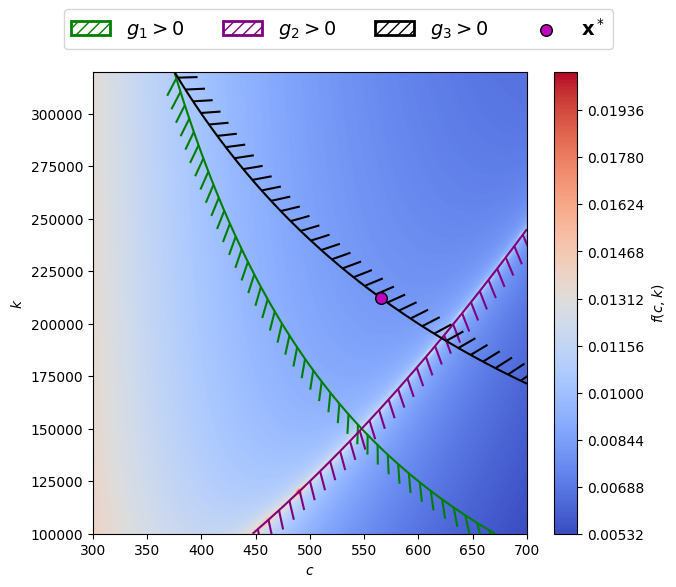

In [93]:
# Problem definition
lb = [300, 100000]
ub = [700, 320000]

# for creating hatched constraints
def constraint_color(cf,color):
    # https://github.com/matplotlib/matplotlib/issues/2789/#issuecomment-604599060
    for i, collection in enumerate(cf.collections):
        collection.set_edgecolor(color)

n = 100
c_linspace = np.linspace(lb[0],ub[0],n)
k_linspace = np.linspace(lb[1],ub[1],n)
C, K = np.meshgrid(c_linspace,k_linspace)
F = -np.log(delta*np.sqrt(abs(1-C**2/(4*m*K))))*2*m/C
G1 = F_0*np.sqrt(m)/(C*np.sqrt(K)) - x_max
G2 = C/(2*np.sqrt(m*K)) - 1
G3 = (K/m)*x_max**2*C/2 - max_power
G4 = 1-C**2/(4*K*m)


fig, ax = plt.subplots(figsize=(7,6))
cf = ax.contourf(C, K, F,cmap="coolwarm",levels=500,zorder=-1)
fig.colorbar(cf, ax=ax, orientation="vertical", label=r"$f(c,k)$")

handles = []; labels = []

# Constraints
cg1 = ax.contour(C, K, G1, [0], colors='green')
plt.setp(cg1.collections,
         path_effects=[patheffects.withTickedStroke(angle=135)])
cg1_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, 
        edgecolor='green', facecolor="none", fill="None", hatch="///")
handles += [cg1_hatch]
labels += [r"$g_1>0$"]

cg2 = ax.contour(C, K, G2, [0], colors='purple')
plt.setp(cg2.collections,
         path_effects=[patheffects.withTickedStroke(angle=60)])
cg2_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, 
        edgecolor='purple', facecolor="none", fill="None", hatch="///")
handles += [cg2_hatch]
labels += [r"$g_2>0$"]

cg3 = ax.contour(C, K, G3, [0], colors='black')
plt.setp(cg3.collections,
         path_effects=[patheffects.withTickedStroke(angle=60)])
cg3_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, 
        edgecolor='black', facecolor="none", fill="None", hatch="///")
handles += [cg3_hatch]
labels += [r"$g_3>0$"]

# 565.79530109, 212090.83880585
opt = ax.scatter([565.79530109,], [212090.83880585], s = 70, marker="o", color="m", 
        edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",
        zorder=3)
handles += [opt]
labels += [r"$\mathbf{x}^*$"]


# legend
ax.set_xlabel("$c$")
ax.set_ylabel("$k$")
#ax.axis("equal")
ax.set_xlim((lb[0],ub[0]))
ax.set_ylim((lb[1],ub[1]))
lx = fig.legend(handles, labels, loc="upper center", ncol=5, 
        fontsize = 14)
plt.show()

# KKT Points

In [94]:
# kkt params
mu1 = sym.Symbol("mu_1")
mu2 = sym.Symbol("mu_2")
mu3 = sym.Symbol("mu_3")

# Lagrangian
L = f + mu1*g1 + mu2*g2 + mu3*g3

# Hessian of Lagrangian
grad_L = sym.Matrix([[sym.diff(L,c)],[sym.diff(L,k)]])
H_L = sym.Symbol("H_L")
H_L = sym.Matrix([sym.diff(grad_L,c).T,
                  sym.diff(grad_L,k).T])


kkt = (sym.diff(L,c), sym.diff(L,k), mu1*g1, mu2*g2, mu3*g3)
solutions = sym.solve(kkt,(c,k,mu1,mu2, mu3), dict=True)

print(solutions)

# only feasible solutions
for sol in solutions:
    print(sol)
    
    # mu >= 0
    if mu1 in sol.keys() and sym.StrictLessThan(sol[mu1], 0):
        print("bad mu_1", sol)
        continue    
    if mu2 in sol.keys() and sym.StrictLessThan(sol[mu2], 0):
        print("bad mu_2", sol)
        continue   
    if mu3 in sol.keys() and sym.StrictLessThan(sol[mu3], 0):
        print("bad mu_3", sol)
        continue

    
    # boundary constraints
    c_sol = sol[c]
    k_sol = sol[k]
    
    if sym.StrictGreaterThan(F_0*np.sqrt(m)/(c_sol*np.sqrt(k_sol)) - x_max, 0) \
    or sym.StrictGreaterThan(c_sol/(2*sym.sqrt(m*k_sol)) - 1 , 0) \
    or sym.StrictGreaterThan((k/m)*x_max**2*c_sol/2 - max_power , 0):
        print("bad constraints", sol)
        continue     
        
    # valid KKT point
    print("valid KKT", sol)

[]


# Non-linear SLSQP

In [96]:
from scipy.optimize import minimize

# optimization function
def f(x):
    c = x[0]; k = x[1]
    return -np.log(delta*np.sqrt(1-c**2/(4*m*k)))*2*m/c

def f_der(x):
    c = x[0]; k = x[1]
    return np.array([1/(2*k*(-c**2/(4*k*m)+1))+2*m*np.log(delta*np.sqrt(-c**2/(4*k*m)+1))/c**2, 
                    -c/(4*k**2*(-c**2/(4*k*m)+1))])

# constraints
def g1(x):
    c = x[0]; k = x[1]
    return -1*(F_0*np.sqrt(m)/(c*np.sqrt(k)) - x_max)

def g1_der(x):
    c = x[0]; k = x[1]
    return -1*np.array([-F_0*np.sqrt(m)/(c**2*np.sqrt(k)),
                       -F_0*np.sqrt(m)/(2*c*k**(3/2))])

g1_con = {
    'type': 'ineq',
    'fun': g1,
    'jac': g1_der
}


def g2(x):
    c = x[0]; k = x[1]
    return -1*(c/(2*np.sqrt(m*k)) - 1)

def g2_der(x):
    c = x[0]; k = x[1]
    return -1*np.array([1/(2*np.sqrt(k*m)),
                       -c/(4*k*np.sqrt(k*m))])

g2_con = {
    'type': 'ineq',
    'fun': g2,
    'jac': g2_der
}


def g3(x):
    c = x[0]; k = x[1]
    return -1*((k/m)*x_max**2*c/2 - max_power)

def g3_der(x):
    c = x[0]; k = x[1]
    return -1*np.array([k*x_max**2/(2*m),
                       c*x_max**2/(2*m)])

g3_con = {
    'type': 'ineq',
    'fun': g3,
    'jac': g3_der
}


constraints = [g1_con, g2_con, g3_con]

x0 = np.array([550, 200000])
opt = minimize(f, x0, method='SLSQP',constraints=constraints, 
               tol=1e-16, jac=f_der)
print(opt)

     fun: 0.008156011198009145
     jac: array([-4.80504238e-06, -1.28184245e-08])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 40
    njev: 40
  status: 0
 success: True
       x: array([   565.79530109, 212090.83880585])
